<a href="https://colab.research.google.com/github/saghar-trade/Time-series/blob/main/Extrapolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor




###y=cos(2x1)+cos(3x2)

In [8]:
# Make the dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3   # uniformly distributed between (-3, +3)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

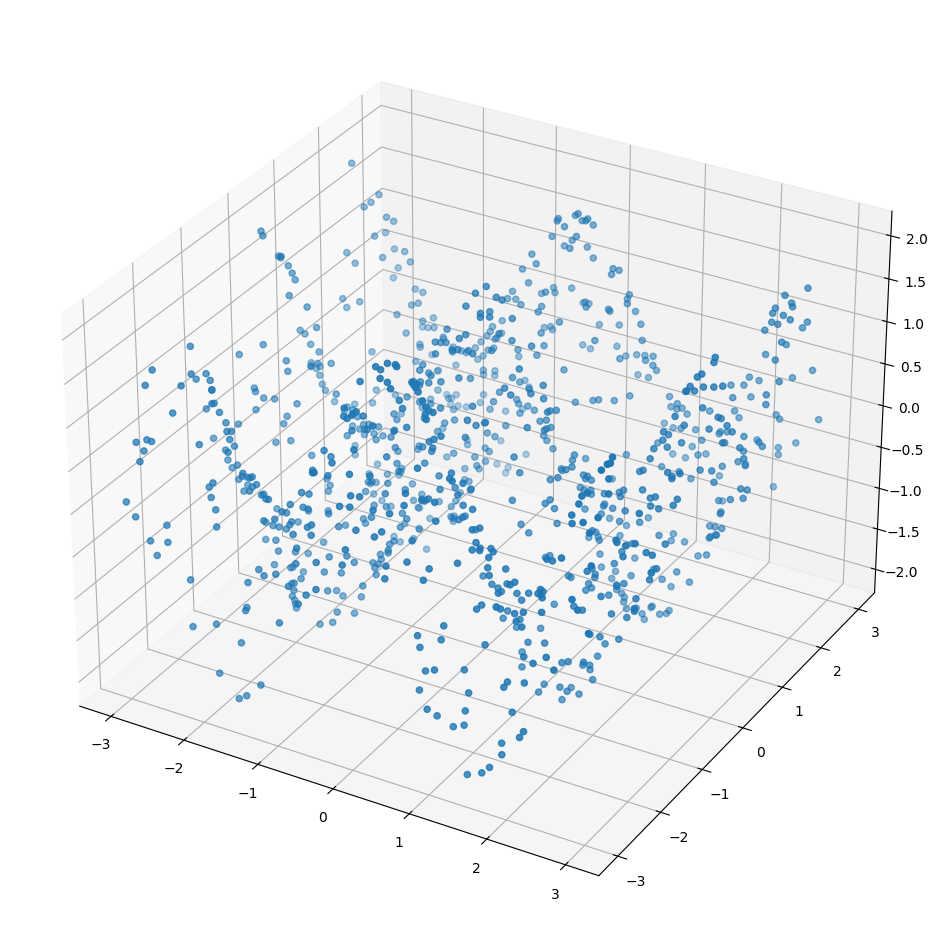

In [9]:
# Fit and plot predictions for each model
fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)



In [10]:
#SVR

model=SVR(C=100.)
model.fit(X,Y)

SVR(C=100.0)

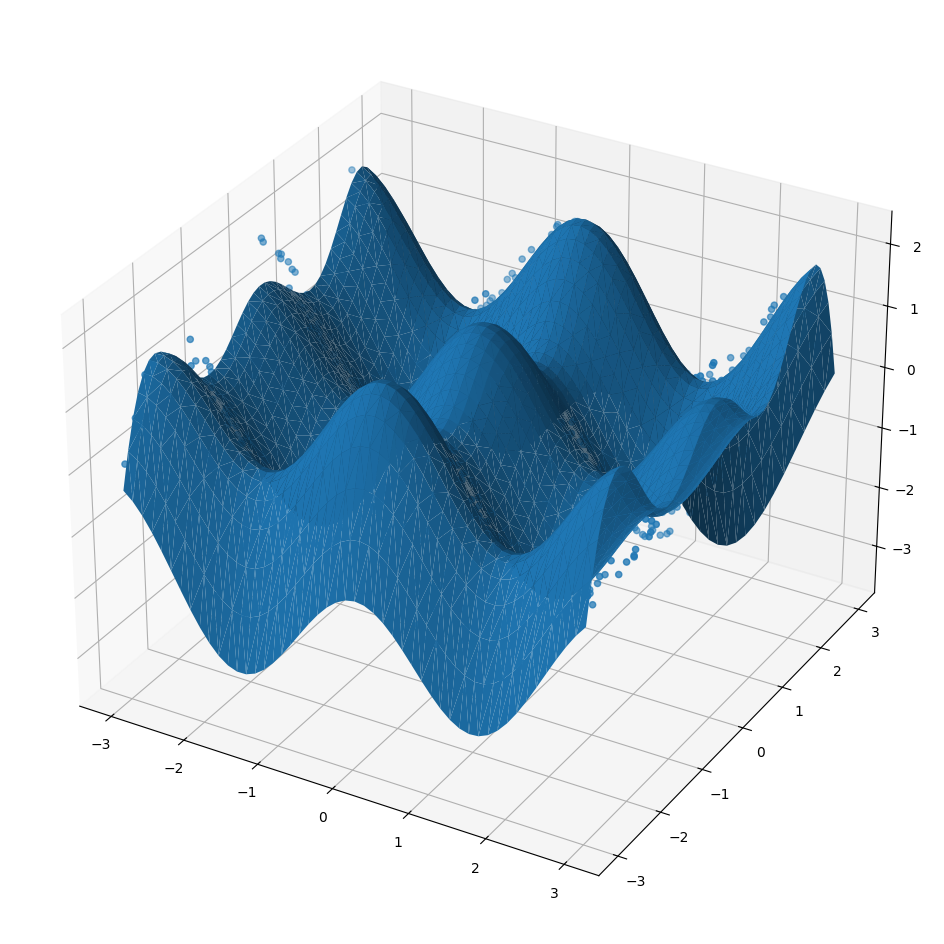

In [16]:
# plot the prediction surface
fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True);




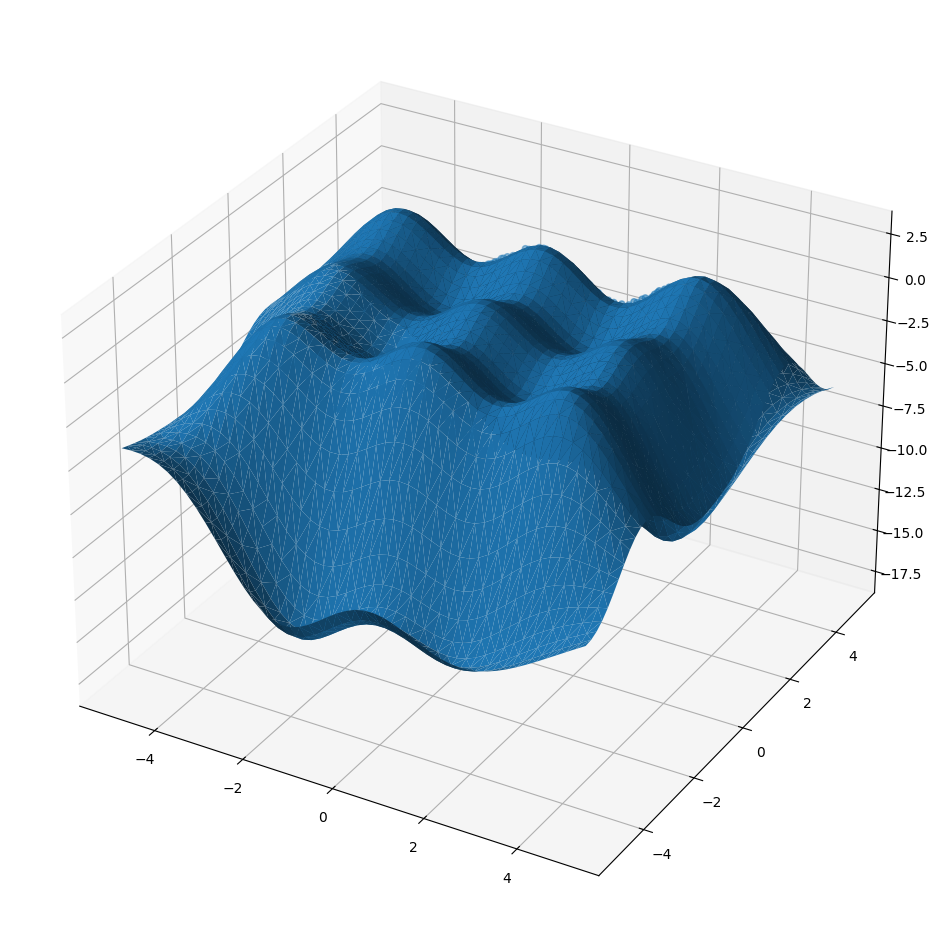

In [14]:
#can it extrapolate


fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True);

#model does not extrapolate well

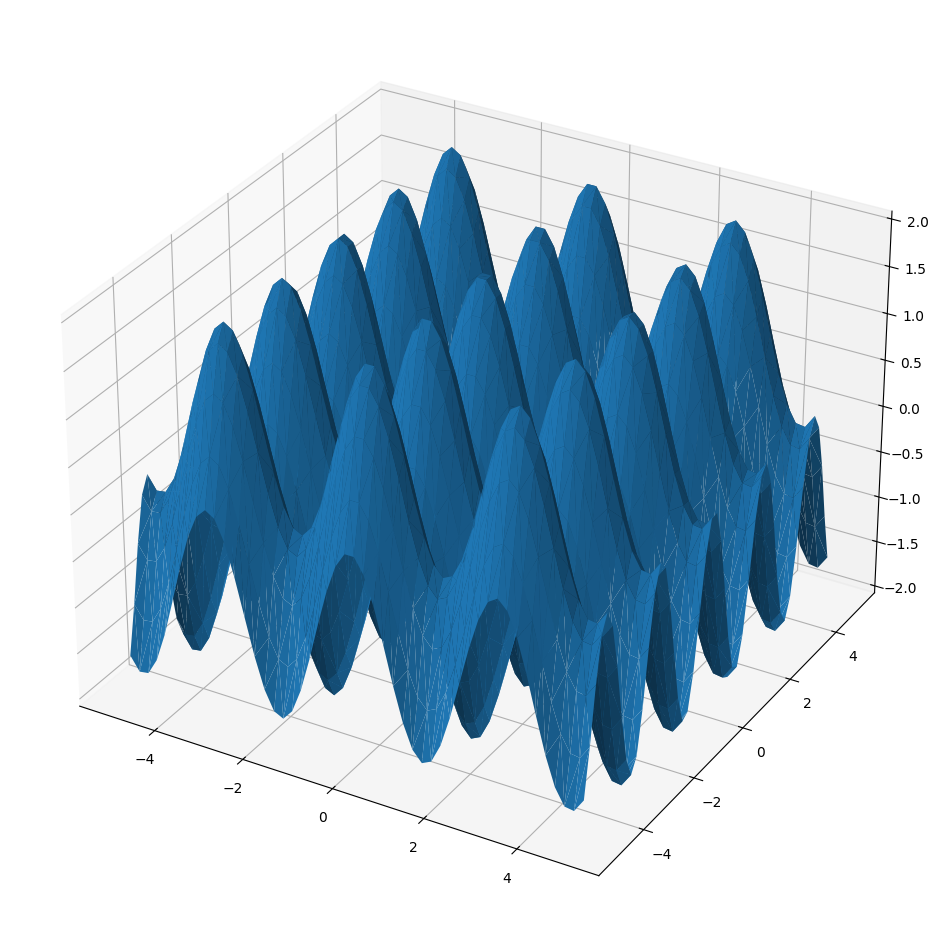

In [19]:
#can it extrapolate


fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
# ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Ytrue = np.cos(2*Xgrid[:,0]) + np.cos(3*Xgrid[:,1])  #true function
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Ytrue, linewidth=0.2, antialiased=True);

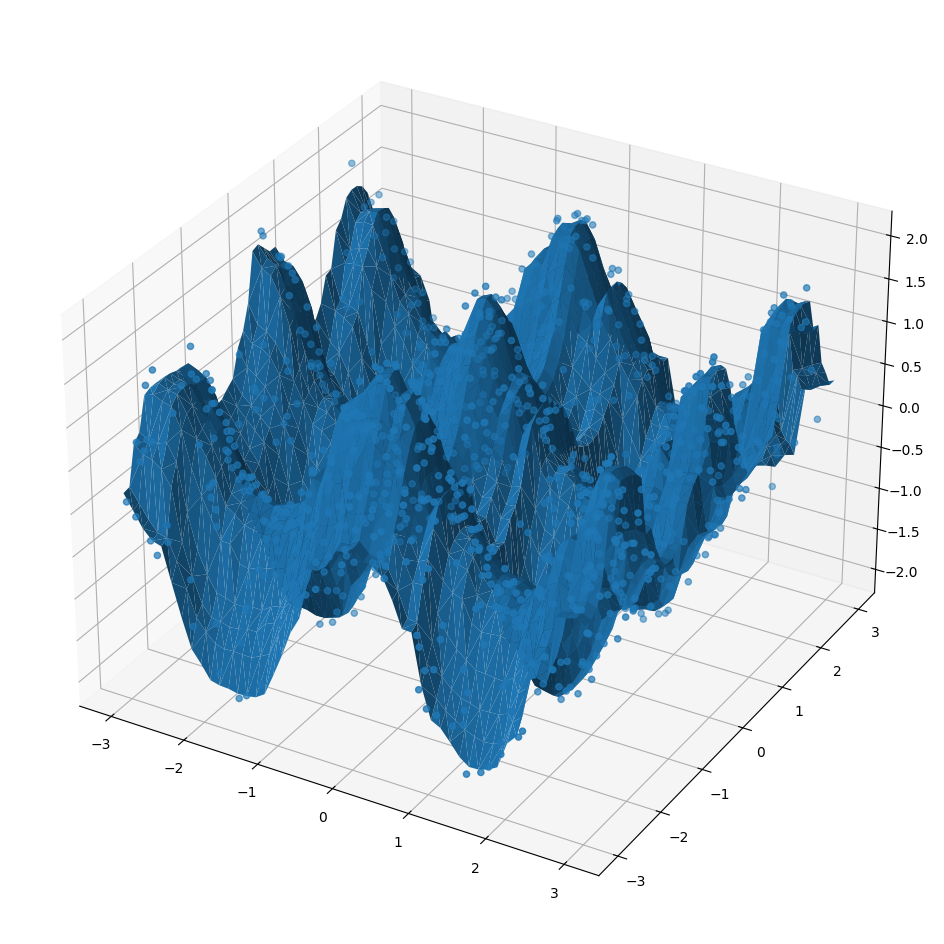

In [21]:
model=RandomForestRegressor()
model.fit(X,Y);

# plot the prediction surface
fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True);

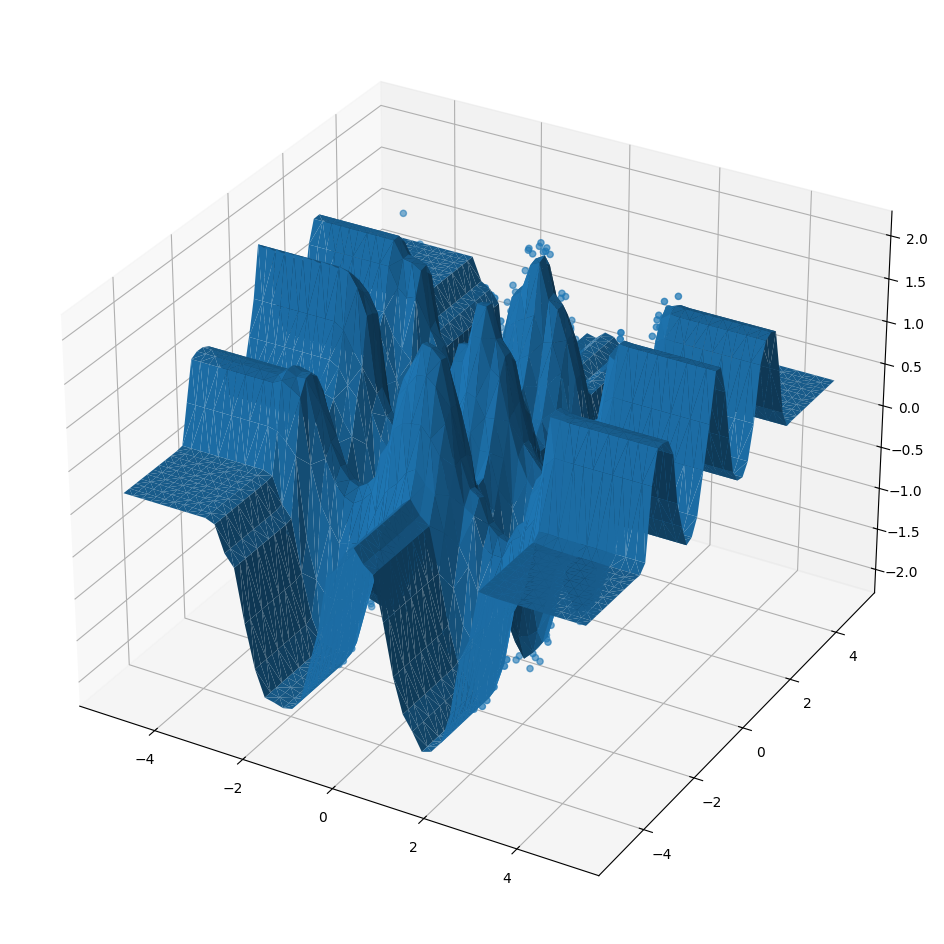

In [23]:
#can it extrapolate


fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True);

#model simply project outline the lastknown prediction

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


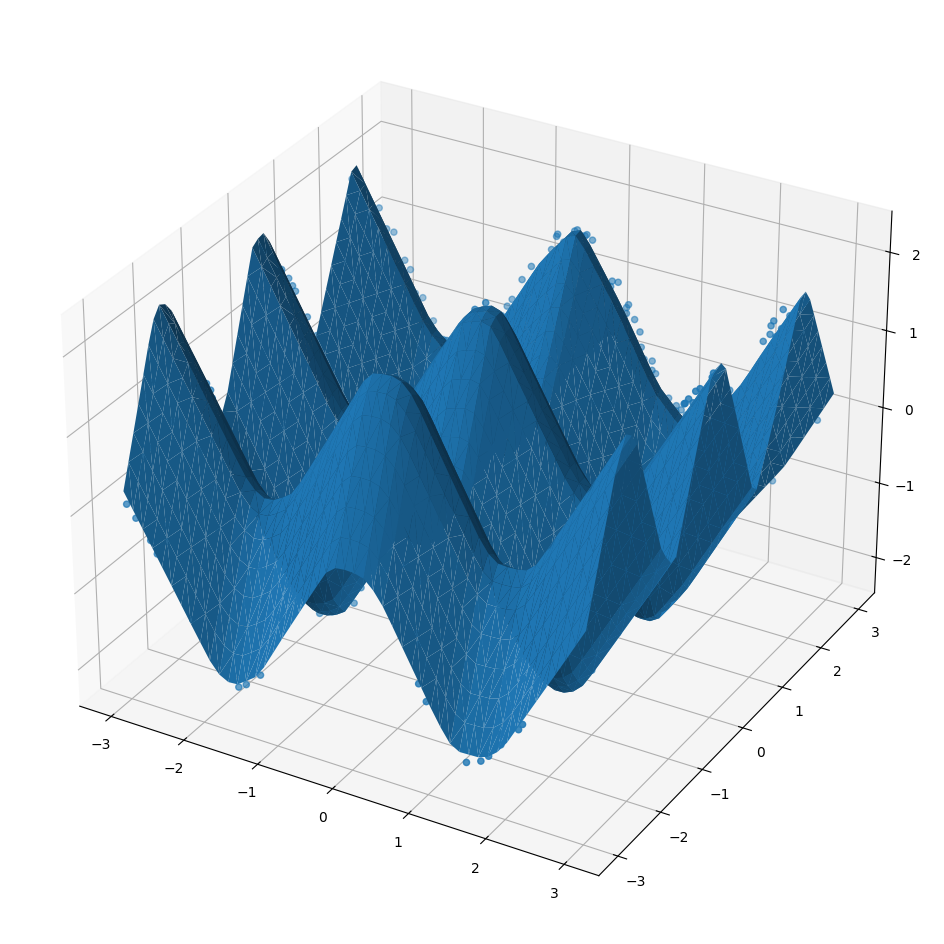

In [26]:
model=MLPRegressor(hidden_layer_sizes=128, alpha=0, learning_rate_init=0.01 )

model.fit(X,Y);

# plot the prediction surface
fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True);

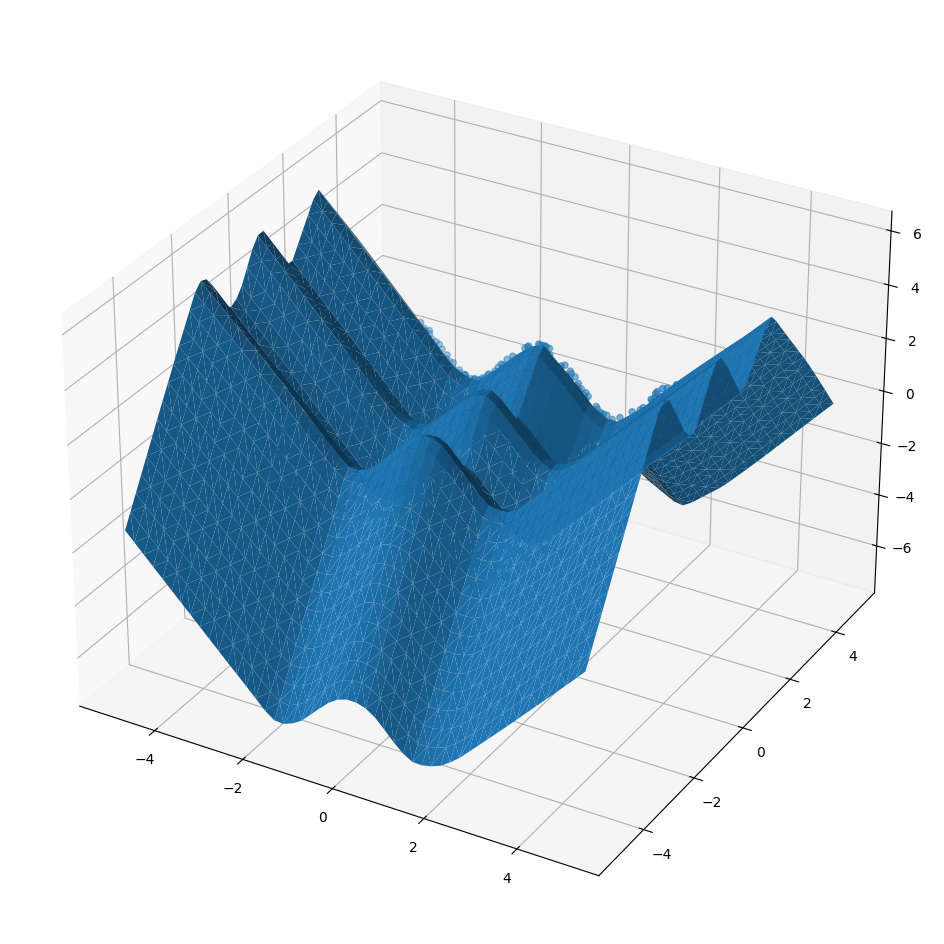

In [27]:
#can it extrapolate


fig = plt.figure(figsize=(16, 12))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
line=np.linspace(-5,5,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth=0.2, antialiased=True);

In [25]:
# Define regressors
regressors = {
    "SVR": SVR(),
    "GaussianProcess": GaussianProcessRegressor(),
    "RandomForest": RandomForestRegressor(),
    "MLPRegressor": MLPRegressor(max_iter=1000)
}

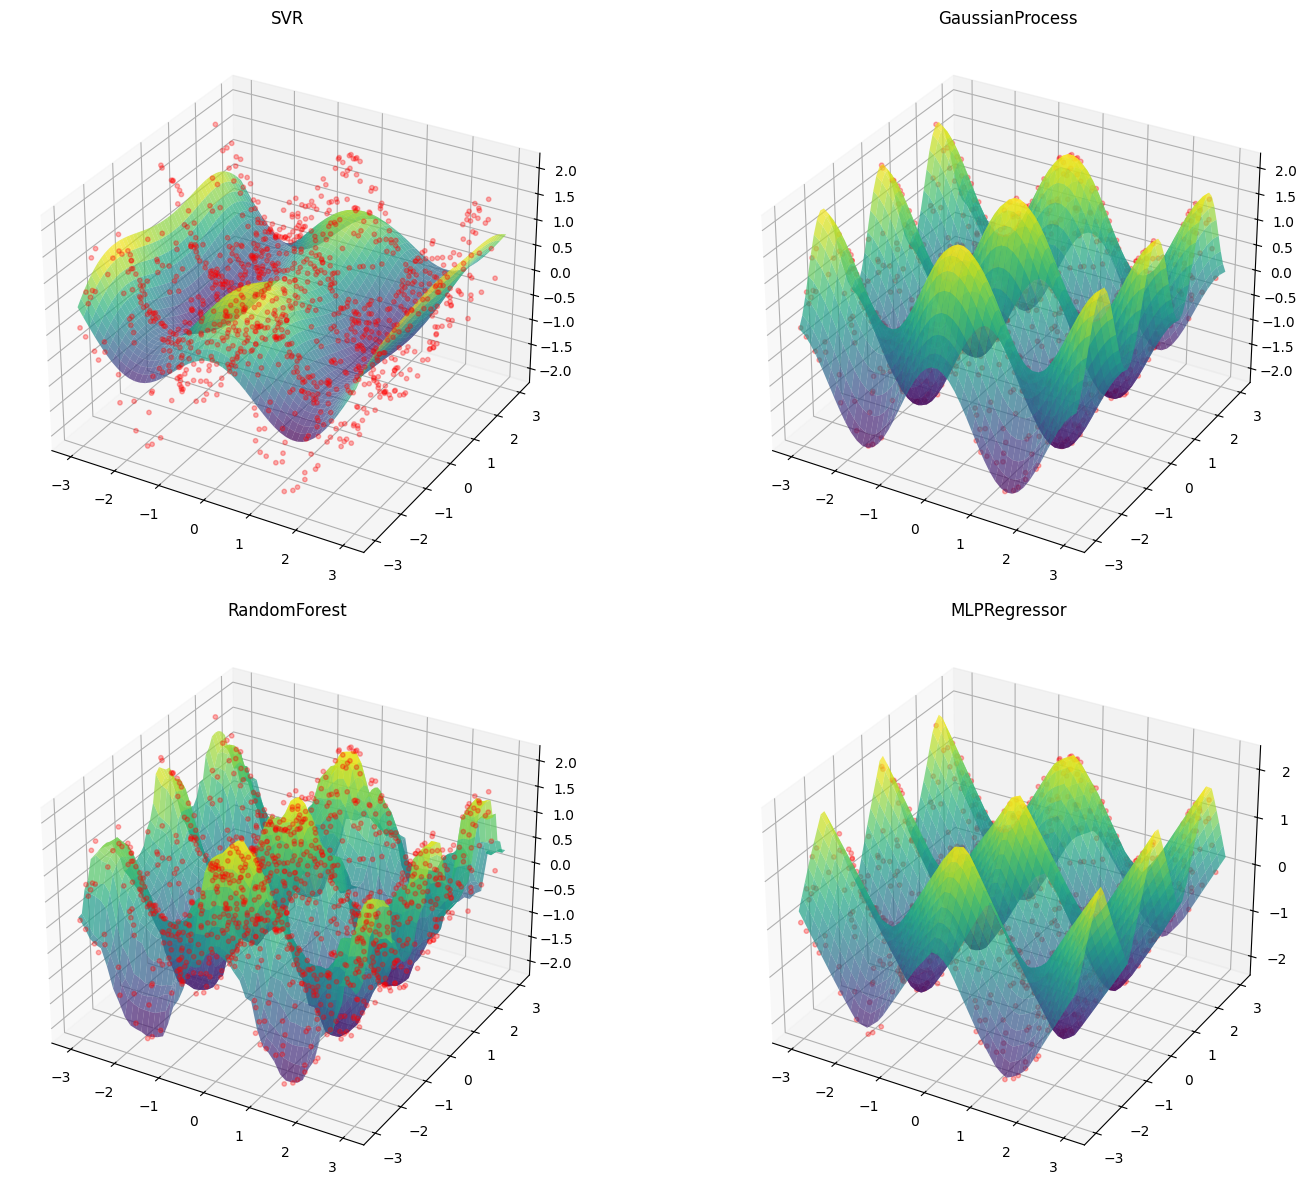

In [28]:
fig = plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(regressors.items(), 1):
    model.fit(X, Y)

    # Make a grid for visualization
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T
    Ypred = model.predict(Xgrid).reshape(xx.shape)

    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.plot_surface(xx, yy, Ypred, cmap='viridis', alpha=0.7)
    ax.scatter(X[:,0], X[:,1], Y, color="r", s=10, alpha=0.3)
    ax.set_title(name)

plt.tight_layout()
plt.show()


###STOCK PRICE

In [32]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/SPY.csv' , index_col='Date', parse_dates=True )
df.tail()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-21  246.740005  249.710007  239.979996  240.699997  234.845886   
2018-12-24  239.039993  240.839996  234.270004  234.339996  228.640564   
2018-12-26  235.970001  246.179993  233.759995  246.179993  240.192596   
2018-12-27  242.570007  248.289993  238.960007  248.070007  242.036667   
2018-12-28  249.580002  251.399994  246.449997  247.750000  241.724442   

               Volume  
Date                   
2018-12-21  255345600  
2018-12-24  147311600  
2018-12-26  218485400  
2018-12-27  186267300  
2018-12-28  153100200

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2263 entries, 2010-01-04 to 2018-12-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2263 non-null   float64
 1   High       2263 non-null   float64
 2   Low        2263 non-null   float64
 3   Close      2263 non-null   float64
 4   Adj Close  2263 non-null   float64
 5   Volume     2263 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [35]:
train=df.iloc[:2000]['Close'].to_numpy()
test=df.iloc[2000:]['Close'].to_numpy()

xtrain=[]
for t in range (len(train)-1):
  x0=train[t]
  x1=train[t+1]
  xtrain.append((x0,x1))

xtest=[]
for t in range (len(test)-1):
  x0=test[t]
  x1=test[t+1]
  xtest.append((x0,x1))

In [36]:
xtrain=np.array(xtrain)
xtest=np.array(xtest)

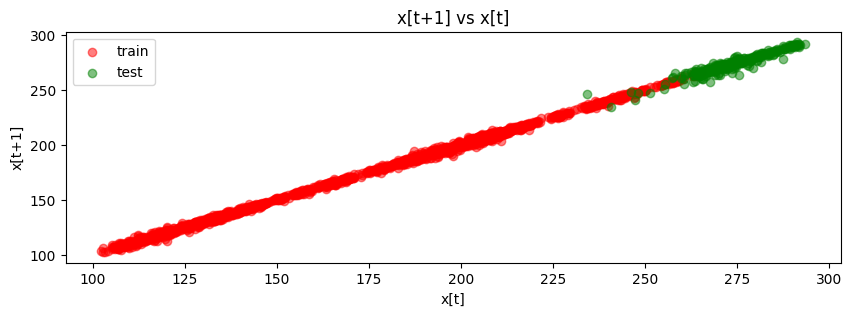

In [41]:
plt.figure(figsize=(10,3))
plt.xlabel('x[t]')
plt.ylabel('x[t+1]')
plt.title('x[t+1] vs x[t]' )
plt.scatter(xtrain[:,0], xtrain[:,1], alpha=0.5,c='r', label='train')
plt.scatter(xtest[:,0], xtest[:,1], alpha=0.5,c='g', label='test')
plt.legend();